<a href="https://colab.research.google.com/github/RhinoBlindado/vc2122/blob/main/practica0/p1_introToOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 0**: Introducción a OpenCV
---
**Asignatura:** Visión por Computador

**Autor:** Lugli, Valentino Glauco

## **Preámbulo**
### Añadiendo las librerías necesarias para realizar la práctica.


In [ ]:
#   Give Google Colab Access to Google Drive
from google.colab import drive
drive.mount("/content/drive/")

#   Using Matplotlib to show images
import matplotlib.pyplot as plt
import matplotlib.colors as clr

#   Using OpenCV for everything else related to images.
import cv2 as cv

#   Using Numpy to manipulate images
import numpy as np

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


---
##**Ejercicio 1** 


### Escribir una función que lea el fichero de una imagen y permita mostrarla tanto en grises como en color




In [ ]:
def leeImagen(filename, flagColor):
    """
    Read an image from file.
    
    Parameters
    ----------
    filename : String
        Path to a valid image file.
    flagColor : Boolean
        Value indicating to read the image with RGB (True) or Grayscale (False).

    Returns
    -------
    TYPE
        DESCRIPTION.

    """
    return cv.imread(filename, int(flagColor))

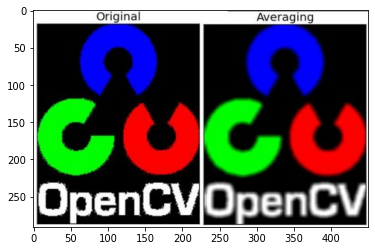

In [ ]:


#   Path the test images.
srcOrapple = "/content/drive//MyDrive/Colab Notebooks/images/orapple.jpg"
srcMessi = "/content/drive//MyDrive/Colab Notebooks/images/messi.jpg"
srcLogo = "/content/drive//MyDrive/Colab Notebooks/images/logoOpenCV.jpg"
srcDave = "/content/drive//MyDrive/Colab Notebooks/images/dave.jpg"

#   Reading image as greyscale.
imageOrappleGrey = leeImagen(srcOrapple, False)
#   Now with colors.
imageOrappleColor = leeImagen(srcOrapple, True)

#   Rest of images
imageDave = leeImagen(srcDave, False)
imageMessi = leeImagen(srcMessi, False)
imageLogo = leeImagen(srcLogo, True)


---
##**Ejercicio 2** 


### Escribir una función que permita visualizar una matriz de números reales cualquiera/arbitraria, tanto monobanda como tribanda 



In [ ]:
def pintaI(im, title=None):
    """
    Print an arbitrary real number matrix

    Parameters
    ----------
    im : Image (Numpy Array)
        Image to be printed to screen.
    title : String, optional
        Title of the image. The default is None.

    Returns
    -------
    None.

    """
    
    # Make each image appear on its own window with optional title.
    plt.figure(title)
    
    # Check if image is grayscale or RGB
    if len(im.shape) == 2:
        # Colormap it to grey and autonormalize values to between 0 and 1.
        plt.imshow(im, cmap='gray', norm=clr.Normalize())
    else:
        # Normalize the color channels to between 0 and 1.
        imAux = (im - np.min(im)) / (np.max(im) - np.min(im))
        # Show the image with the channels flipped since OpenCV reads in BGR and Matplotlib shows in RGB.
        plt.imshow(imAux[:,:,::-1])

In [ ]:
# Task 2: Visualize an arbitrary real number matrix
##########

#   Generating random matrices with different ranges
greyScaleMatrix = np.random.default_rng().uniform(-10.0, 220.0, (8,8))
colorMatrix = np.random.default_rng().uniform(-10.0, 16.0, (8,8,3))

#   Showing the Orapples along with the matrices
pintaI(imageOrappleGrey)
pintaI(imageOrappleColor)
pintaI(greyScaleMatrix)
pintaI(colorMatrix)

---
##**Ejercicio 3** 
## a

In [ ]:
def pintaIM(vim, title=None):
    """
    Print an horizontal list of images as one single picture.
    
    Parameters
    ----------
    vim : List of images
        A list containing images (Numpy Arrays), can be of any size and Grayscale or RGB.
    title : String, optional
        Title of the whole image. The default is None.

    Returns
    -------
    None.

    """
    # Padding color, in this case: white.
    color = (255, 255, 255)
    
    # Getting the maximum height of the list of images.
    maxHeight = max(i.shape[0] for i in vim)
    
    # This implementantions takes the biggest image and makes that the maximum height of the picture strip
    # therefore any image that is smaller than this height will be added in their original size, 
    # the rest of the space will be padded with a color, in this case, white.
    
    # Start to work on the first image, if it's grayscale convert it to BGR.
    if(len(vim[0].shape) == 2): vim[0] = Gray2Color(vim[0])   
    
    # If the image doesn't have the max height, add white padding vertically.
    if(vim[0].shape[0] != maxHeight):
        strip = cv.copyMakeBorder(vim[0], 0, maxHeight-vim[0].shape[0], 0, 0, cv.BORDER_CONSTANT, value=color)       
    else:
        strip = vim[0]
    
    # Repeat this process for the rest of the images vector.
    for i in vim[1:]:    

        # If grayscale, convert it to BGR.        
        if(len(i.shape) == 2): i = Gray2Color(i)
        
        # In adition to adding padding if needed, now concatenate horizontally the pictures.
        if(i.shape[0] != maxHeight):
            strip = cv.hconcat([strip, cv.copyMakeBorder(i, 0, maxHeight-i.shape[0], 0, 0, cv.BORDER_CONSTANT, value=color)])       
        else:
            strip = cv.hconcat([strip, i])

    # Once it's done, print the image strip as one picture.
    pintaI(strip, title)

In [ ]:
# Task 3: Concatenate multiple images into one
##########

#   Constructing an image vector
imageVector = []
imageVector.append(imageDave)
imageVector.append(imageMessi)
imageVector.append(imageLogo)

#   Showing the image vector as one picture.
pintaIM(imageVector)

---
##**Ejercicio 4**
## a

In [ ]:
def cambiarColor(imagen, listaPuntos, color):
    """
    Changes the color of an image, given a list of points and a given color.
    
    Parameters
    ----------
    imagen : Image (Numpy Array)
        The base image to be modified.
    listaPuntos : Vector of 2D Numpy Arrays
        The list of points that are to be changed in color.
    color : 3D tuple
        The color to paint the image in the list of points.

    Returns
    -------
    imagen : Image (Numpy Array)
        Returns the modified image.

    """
    if(len(imagen.shape) == 2): imagen = Gray2Color(imagen)
    
    for coord in listaPuntos:
        if(0 <= coord[0] < imagen.shape[0] and 0 <= coord[1] < imagen.shape[1]):
            imagen[coord[0], coord[1], :] = color
        
    return imagen

In [ ]:
# Task 4: Change the pixels of an image given a list of coordinates.
##########
imagen = imageMessi
color = (255, 0, 0)

#   Generating the points: in this case a 100x100 square centered on the picture.
xStart = int(imagen.shape[0] / 2) - 50
yStart = int(imagen.shape[1] / 2) - 50

pointVector = []
for i in range(0, 100):
    for j in range (0, 100):
        pointVector.append(np.array([xStart+i, yStart+j])) 
    
#   Calling the function and then printing the image.
moddedImage = cambiarColor(imagen, pointVector, color)
pintaI(moddedImage)

---
##**Ejercicio 5**
## a

In [ ]:
def pintaIMVentana(dictIm):
    """
    Prints a series of images in the same window but each image has its own title.

    Parameters
    ----------
    dictIm : Dictionary of "Title : Image"
        Dictionary containg a Title that maps to an Image object (Numpy Array) to be printed.

    Returns
    -------
    None.

    """
    # Get the size of the dictionary
    size = len(dictIm)
    
    # Setting the size of the window.
    fig = plt.figure(figsize=(10,4))

    # For each element in the dictionary...
    i = 1
    for element in dictIm:
        # ... add a subplot horizontally for each image; index 'i' is an identifier..
        fig.add_subplot(1, size, i)
        im = dictIm[element]
        # ...Add the image to the subplot, same prodecure as normal printing, ...
        if len(im.shape) == 2:
            plt.imshow(im, cmap='gray', norm=clr.Normalize())
        else:
            imAux = (im - np.min(im)) / (np.max(im) - np.min(im))
            plt.imshow(imAux[:,:,::-1])
        # ... Add the title...
        plt.title(element)
        # ... And update the identifier (just a counter, really).
        i+=1
    
    # Set up the layout.
    fig.tight_layout()
    # Show the image to screen.
    plt.show()

In [ ]:
# Task 5: Show multiple images in a single window with their own titles.
##########

#   Setting up a dictionary to be used for the generation of each image.
imageDict = {"Dave" : imageDave, "Pecho frío" : imageMessi, "Logotipo" : imageLogo, "Orapple" : imageOrappleColor, "Ruido" : colorMatrix}
pintaIMVentana(imageDict)